In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\\kaggle\\Air Crashes Full Data 1908 -2023\\aircrashesFullData.csv')

Exploratory data analysis (EDA)

In [4]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,August,6,British,Curtiss,Curtiss seaplane?,Victoria British,Canada Columbia Private,0,1,1
4,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20


In [5]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator',
       'Sum of Ground', 'Sum of Fatalities (air)', 'Sum of Aboard'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     5030 non-null   int64 
 1   Quarter                  5030 non-null   object
 2   Month                    5030 non-null   object
 3   Day                      5030 non-null   int64 
 4   Country/Region           4800 non-null   object
 5   Aircraft Manufacturer    5030 non-null   object
 6   Aircraft                 5030 non-null   object
 7   Location                 5030 non-null   object
 8   Operator                 4796 non-null   object
 9   Sum of Ground            5030 non-null   int64 
 10  Sum of Fatalities (air)  5030 non-null   int64 
 11  Sum of Aboard            5030 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 471.7+ KB


In [7]:
df.isnull().sum()

Year                         0
Quarter                      0
Month                        0
Day                          0
Country/Region             230
Aircraft Manufacturer        0
Aircraft                     0
Location                     0
Operator                   234
Sum of Ground                0
Sum of Fatalities (air)      0
Sum of Aboard                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.dropna()

In [10]:
df['Country/Region'] = df['Country/Region'].replace('?','')

In [11]:
df['Aircraft'] = df['Aircraft'].str.replace('?','',regex=True)

In [12]:
# عدد الناجين
df['Survivors'] = df['Sum of Aboard'] - df['Sum of Fatalities (air)']


In [13]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard,Survivors
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5,0
3,1913,Qtr 3,August,6,British,Curtiss,Curtiss seaplane,Victoria British,Canada Columbia Private,0,1,1,0
5,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28,0
6,1915,Qtr 1,March,5,Belgium,Zeppelin,Zeppelin L 8 (airship),Tienen Belgium,Navy German - Military,0,17,41,24


What is the temporal distribution of accidents by years, months, and days?

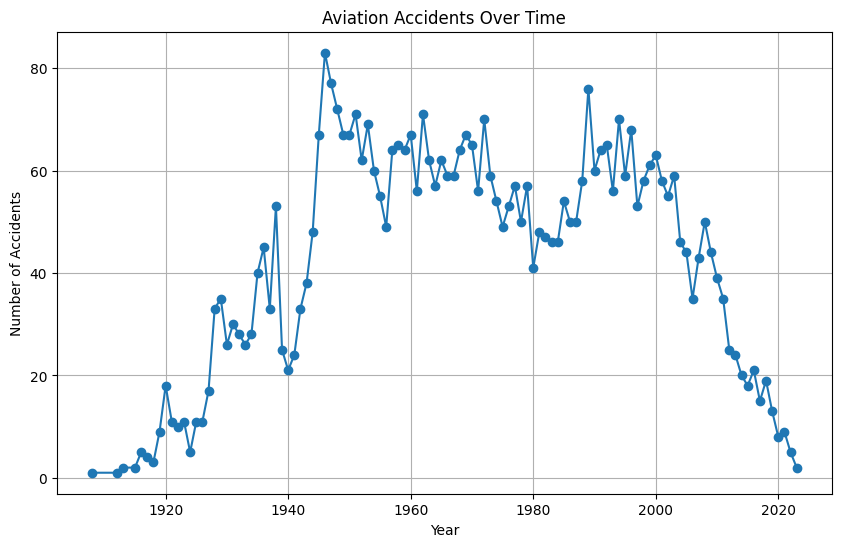

In [30]:
accidents_by_year = df['Year'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o', linestyle='-')
plt.title('Aviation Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

In [31]:
df_accidents_month = df['Month'].value_counts().sort_index()


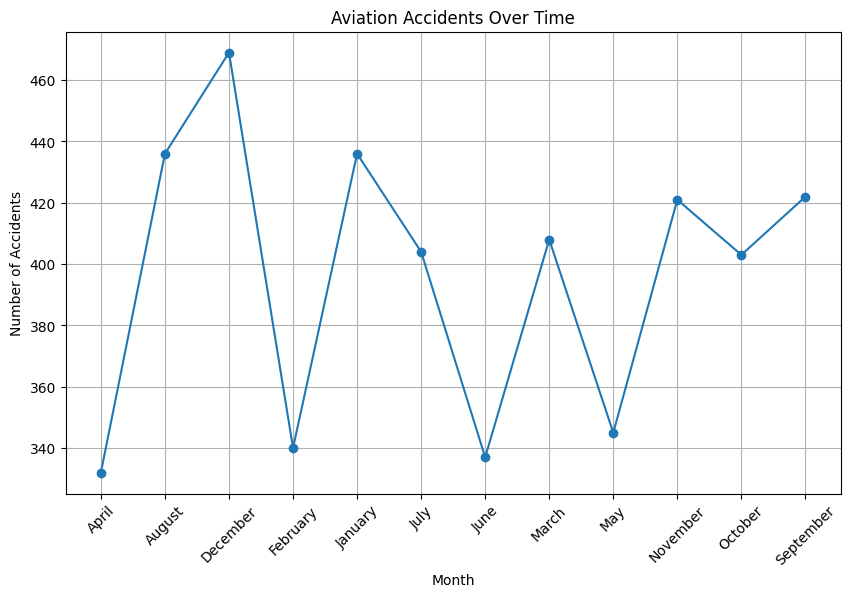

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df_accidents_month.index, df_accidents_month.values, marker='o', linestyle='-')
plt.title('Aviation Accidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [35]:
df_accidents_day = df['Day'].value_counts().reset_index()
df_accidents_day.columns = ['Day','count']

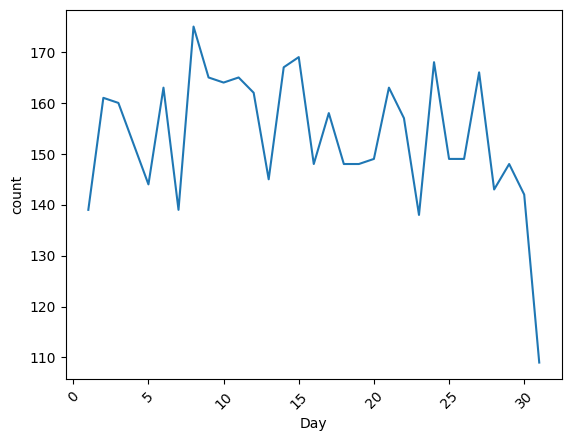

In [40]:
sns.lineplot(data=df_accidents_day,x='Day',y='count')
plt.xticks(rotation=45)
plt.show()

Which countries/regions have been most affected by aviation accidents?

In [20]:
country_accident_counts = df['Country/Region'].value_counts().reset_index()
country_accident_counts.columns = ['Country/Region', 'Accident Count']
country_accident_counts

,Country/Region,Accident Count
0,Russia,249
1,Brazil,162
2,Colombia,146
3,New,142
4,California,112
...,...,...
503,Granada,1
504,Wantagh,1
505,Phillipines,1
506,Montserrat,1


In [21]:
import plotly.express as px

In [22]:
# إنشاء خريطة Plotly Express
fig = px.scatter_geo(country_accident_counts, 
                     locations="Country/Region", 
                     locationmode='country names',
                     color="Accident Count", 
                     hover_name="Country/Region",
                     size="Accident Count",
                     projection="natural earth",
                     title="Aviation Accidents by Country/Region")

# تعديل التصميم والتخصيص
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# عرض الخريطة
fig.show()


Which airlines have been most impacted by accidents?

In [23]:
df_airlines = df['Operator'].value_counts().reset_index().head(20)
df_airlines.columns = ['Operator','count']


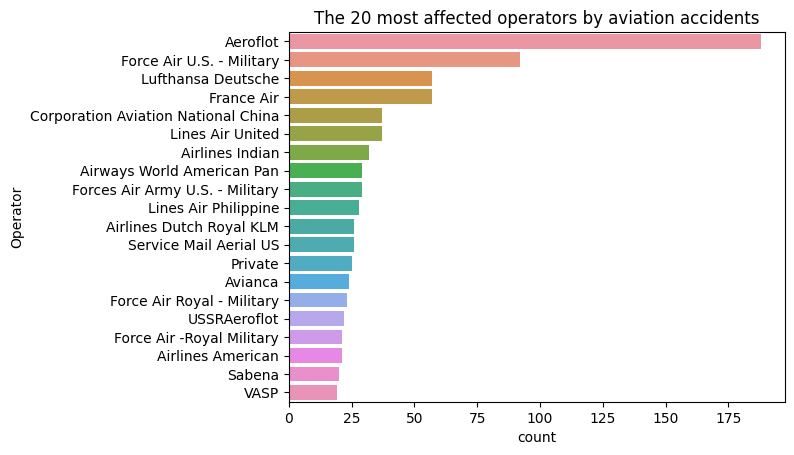

In [24]:
sns.barplot(data=df_airlines,x='count',y='Operator')
plt.title('The 20 most affected operators by aviation accidents')
plt.show()

What are the most commonly used aircraft in accidents?

In [25]:
df_aircraft = df['Aircraft'].value_counts().reset_index().head(20)
df_aircraft.columns = ['Aircraft','count']

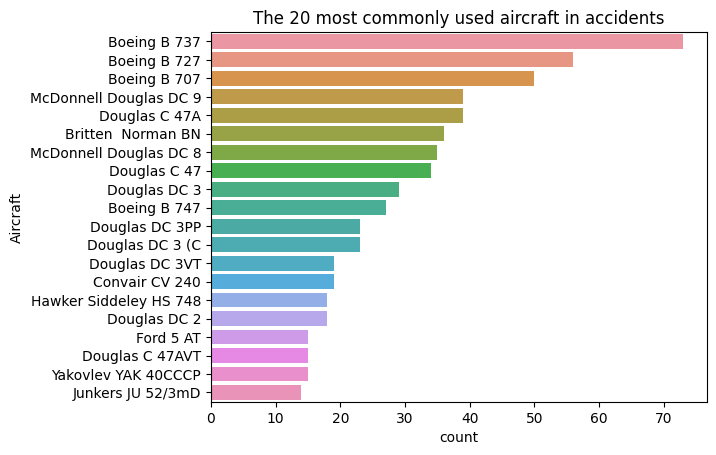

In [26]:
sns.barplot(data=df_aircraft,x='count',y='Aircraft')
plt.title('The 20 most commonly used aircraft in accidents')
plt.show()

What are the ground casualties and fatalities (Ground Casualties) resulting from accidents?

In [27]:
total_ground_casualties = df['Sum of Ground'].sum()
total_fatalities_on_ground = df['Sum of Fatalities (air)'].sum()
print(f"Total Ground Casualties: {total_ground_casualties}")
print(f"Total Fatalities on Ground: {total_fatalities_on_ground}")



Total Ground Casualties: 8574
Total Fatalities on Ground: 106254


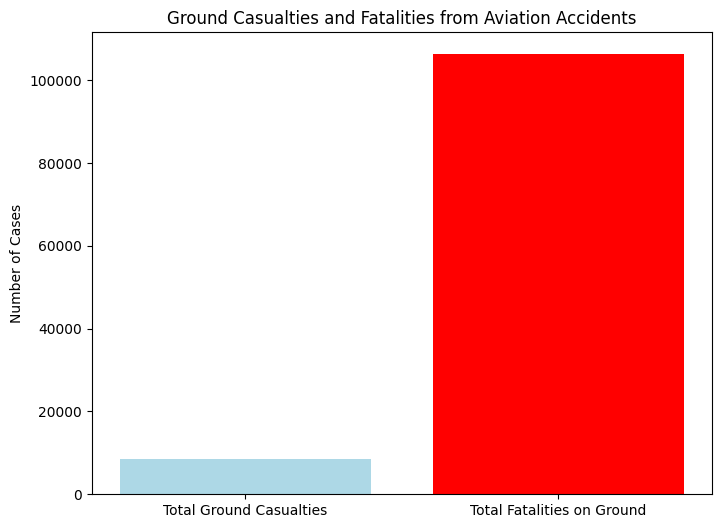

In [28]:
ground_data = [total_ground_casualties, total_fatalities_on_ground]
labels = ['Total Ground Casualties', 'Total Fatalities on Ground']
plt.figure(figsize=(8, 6))
plt.bar(labels, ground_data, color=['lightblue', 'red'])
plt.title('Ground Casualties and Fatalities from Aviation Accidents')
plt.ylabel('Number of Cases')
plt.show()